# Imports and configs

In [1]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import pickle
import shutil
import os

warnings.filterwarnings('ignore')

In [2]:
class CFG:
    train_path = '/kaggle/input/playground-series-s5e3/train.csv'
    test_path = '/kaggle/input/playground-series-s5e3/test.csv'
    sample_sub_path = '/kaggle/input/playground-series-s5e3/sample_submission.csv'
    original_path = '/kaggle/input/rainfall-prediction-using-machine-learning/Rainfall.csv'
    
    target = 'rainfall'
    n_folds = 5
    seed = 42
    time_limit = 3600 * 11

# Loading data and predefining folds

In [3]:
train = pd.read_csv(CFG.train_path, index_col='id')
test = pd.read_csv(CFG.test_path, index_col='id')

original = pd.read_csv(CFG.original_path)
original['id'] = train.index.max() + 1 + original.index
original = original.set_index('id')
original.columns = original.columns.str.replace(' ', '')
original[CFG.target] = original[CFG.target].map({'yes': 1, 'no': 0})

In [4]:
skf = StratifiedKFold(n_splits=CFG.n_folds, random_state=CFG.seed, shuffle=True)
split = skf.split(train, train[CFG.target])
for i, (_, val_index) in enumerate(split):
    train.loc[val_index, 'fold'] = i

# Fitting the predictor

In [5]:
predictor = TabularPredictor(
    path='/AutoGluonModels',
    problem_type='binary',
    eval_metric='roc_auc',
    label=CFG.target,
    groups='fold',
    verbosity=2
)

In [6]:
predictor.fit_pseudolabel(
    pseudo_data=original,
    train_data=train,
    time_limit=CFG.time_limit,
    presets='best_quality'
)

Predictor not fit prior to pseudolabeling. Fitting now...
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Nov 10 10:07:59 UTC 2024
CPU Count:          4
Memory Avail:       30.30 GB / 31.35 GB (96.6%)
Disk Space Avail:   1892.13 GB / 8062.39 GB (23.5%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the

(autoscaler +5m46s) Tip: use `ray status` to view detailed cluster status. To disable these messages, set RAY_SCHEDULER_EVENTS=0.
(autoscaler +5m46s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8945	 = Validation score   (roc_auc)
(_dystack pid=162) 	6.71s	 = Training   runtime
(_dystack pid=162) 	0.01s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r102_BAG_L1 ... Training model for up to 6248.95s of the 9548.70s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +6m22s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=4743) No improvement since epoch 5: early stopping
(_dystack pid=162) 	0.8963	 = Validation score   (roc_auc)
(_dystack pid=162) 	47.05s	 = Training   runtime
(_dystack pid=162) 	0.32s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r13_BAG_L1 ... Training model for up to 6198.25s of the 9497.99s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.06%)
(_dystack pid=162) 	0.8919	 = Validation score   (roc_auc)
(_dystack pid=162) 	15.25s	 = Training   runtime
(_dystack pid=162) 	0.01s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r195_BAG_L1 ... Training model for up to 6179.51s of the 9479.25s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gp

(autoscaler +7m7s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8766	 = Validation score   (roc_auc)
(_dystack pid=162) 	11.64s	 = Training   runtime
(_dystack pid=162) 	0.58s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r188_BAG_L1 ... Training model for up to 6164.11s of the 9463.86s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.03%)
(_dystack pid=162) 	0.8914	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.55s	 = Training   runtime
(_dystack pid=162) 	0.04s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r145_BAG_L1 ... Training model for up to 6152.92s of the 9452.67s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +7m42s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=5561) No improvement since epoch 7: early stopping
(_ray_fit pid=5741) No improvement since epoch 8: early stopping [repeated 2x across cluster]
(_dystack pid=162) 	0.8828	 = Validation score   (roc_auc)
(_dystack pid=162) 	26.17s	 = Training   runtime
(_dystack pid=162) 	0.17s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r89_BAG_L1 ... Training model for up to 6123.18s of the 9422.92s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.8885	 = Validation score   (roc_auc)
(_dystack pid=162) 	4.48s	 = Training   runtime
(_dystack pid=162) 	0.04s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r30_BAG_L1 ... Training model for up to 6114.97s of the 9414.72s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, pe

(autoscaler +8m17s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8874	 = Validation score   (roc_auc)
(_dystack pid=162) 	24.88s	 = Training   runtime
(_dystack pid=162) 	0.08s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r130_BAG_L1 ... Training model for up to 6086.57s of the 9386.32s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.8906	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.08s	 = Training   runtime
(_dystack pid=162) 	0.04s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r86_BAG_L1 ... Training model for up to 6076.11s of the 9375.86s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)


(autoscaler +8m52s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8804	 = Validation score   (roc_auc)
(_dystack pid=162) 	19.39s	 = Training   runtime
(_dystack pid=162) 	0.07s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r50_BAG_L1 ... Training model for up to 6052.70s of the 9352.45s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8972	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.93s	 = Training   runtime
(_dystack pid=162) 	0.01s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r11_BAG_L1 ... Training model for up to 6041.01s of the 9340.76s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +9m27s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=6662) No improvement since epoch 5: early stopping
(_dystack pid=162) 	0.8922	 = Validation score   (roc_auc)
(_dystack pid=162) 	30.13s	 = Training   runtime
(_dystack pid=162) 	0.18s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r194_BAG_L1 ... Training model for up to 6007.19s of the 9306.94s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.03%)
(_dystack pid=162) 	0.8829	 = Validation score   (roc_auc)
(_dystack pid=162) 	4.95s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTrees_r172_BAG_L1 ... Training model for up to 5998.74s of the 9298.49s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=

(autoscaler +10m7s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8874	 = Validation score   (roc_auc)
(_dystack pid=162) 	6.38s	 = Training   runtime
(_dystack pid=162) 	0.56s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r69_BAG_L1 ... Training model for up to 5988.67s of the 9288.42s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8929	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.07s	 = Training   runtime
(_dystack pid=162) 	0.01s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r103_BAG_L1 ... Training model for up to 5978.05s of the 9277.80s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_ray_fit pid=7478) No improvement since epoch 10: early stopping
(_dystack pid=162) 	0.8868	 = Validation score   (roc_auc)

(autoscaler +10m52s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8915	 = Validation score   (roc_auc)
(_dystack pid=162) 	15.85s	 = Training   runtime
(_dystack pid=162) 	0.07s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r161_BAG_L1 ... Training model for up to 5933.38s of the 9233.13s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.06%)
(_ray_fit pid=7655) No improvement since epoch 18: early stopping
(_dystack pid=162) 	0.885	 = Validation score   (roc_auc)
(_dystack pid=162) 	9.55s	 = Training   runtime
(_dystack pid=162) 	0.13s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r143_BAG_L1 ... Training model for up to 5920.06s of the 9219.81s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +11m27s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8859	 = Validation score   (roc_auc)
(_dystack pid=162) 	15.68s	 = Training   runtime
(_dystack pid=162) 	0.08s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r70_BAG_L1 ... Training model for up to 5900.89s of the 9200.63s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.8912	 = Validation score   (roc_auc)
(_dystack pid=162) 	12.18s	 = Training   runtime
(_dystack pid=162) 	0.02s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r156_BAG_L1 ... Training model for up to 5885.25s of the 9184.99s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +12m2s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=8464) No improvement since epoch 3: early stopping
(_ray_fit pid=8641) No improvement since epoch 18: early stopping [repeated 3x across cluster]
(_dystack pid=162) 	0.8914	 = Validation score   (roc_auc)
(_dystack pid=162) 	46.38s	 = Training   runtime
(_dystack pid=162) 	0.37s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r196_BAG_L1 ... Training model for up to 5835.28s of the 9135.02s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.03%)


(autoscaler +12m48s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(_ray_fit pid=8692) [1000]	valid_set's binary_logloss: 0.289544
(_ray_fit pid=8819) [1000]	valid_set's binary_logloss: 0.316864 [repeated 4x across cluster]


(_dystack pid=162) 	0.893	 = Validation score   (roc_auc)
(_dystack pid=162) 	9.29s	 = Training   runtime
(_dystack pid=162) 	0.4s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r39_BAG_L1 ... Training model for up to 5822.08s of the 9121.83s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.8784	 = Validation score   (roc_auc)
(_dystack pid=162) 	10.09s	 = Training   runtime
(_dystack pid=162) 	0.65s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r167_BAG_L1 ... Training model for up to 5808.36s of the 9108.11s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.03%)
(_dystack pid=162) 	0.891	 = Validation score   

(autoscaler +13m28s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=9284) No improvement since epoch 7: early stopping
(_ray_fit pid=9463) No improvement since epoch 9: early stopping [repeated 3x across cluster]
(_dystack pid=162) 	0.8812	 = Validation score   (roc_auc)
(_dystack pid=162) 	25.59s	 = Training   runtime
(_dystack pid=162) 	0.17s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r41_BAG_L1 ... Training model for up to 5767.09s of the 9066.83s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)


(autoscaler +14m3s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8847	 = Validation score   (roc_auc)
(_dystack pid=162) 	27.85s	 = Training   runtime
(_dystack pid=162) 	0.07s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r98_BAG_L1 ... Training model for up to 5733.46s of the 9033.20s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.06%)
(_dystack pid=162) 	0.8871	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.38s	 = Training   runtime
(_dystack pid=162) 	0.12s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r15_BAG_L1 ... Training model for up to 5720.46s of the 9020.20s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +14m43s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8885	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.07s	 = Training   runtime
(_dystack pid=162) 	0.04s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r158_BAG_L1 ... Training model for up to 5708.83s of the 9008.58s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.8874	 = Validation score   (roc_auc)
(_dystack pid=162) 	29.24s	 = Training   runtime
(_dystack pid=162) 	0.07s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r86_BAG_L1 ... Training model for up to 5676.07s of the 8975.82s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.06%)


(autoscaler +15m28s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8929	 = Validation score   (roc_auc)
(_dystack pid=162) 	12.82s	 = Training   runtime
(_dystack pid=162) 	0.01s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r37_BAG_L1 ... Training model for up to 5659.50s of the 8959.24s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_ray_fit pid=10391) No improvement since epoch 15: early stopping
(_dystack pid=162) 	0.8864	 = Validation score   (roc_auc)
(_dystack pid=162) 	21.11s	 = Training   runtime
(_dystack pid=162) 	0.12s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r197_BAG_L1 ... Training model for up to 5634.74s of the 8934.48s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)


(autoscaler +16m8s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.895	 = Validation score   (roc_auc)
(_dystack pid=162) 	15.52s	 = Training   runtime
(_dystack pid=162) 	0.06s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r49_BAG_L1 ... Training model for up to 5615.32s of the 8915.06s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8954	 = Validation score   (roc_auc)
(_dystack pid=162) 	6.41s	 = Training   runtime
(_dystack pid=162) 	0.01s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTrees_r49_BAG_L1 ... Training model for up to 5605.15s of the 8904.90s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.8859	 = Validation score   (

(autoscaler +16m48s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8809	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.53s	 = Training   runtime
(_dystack pid=162) 	0.05s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r127_BAG_L1 ... Training model for up to 5581.51s of the 8881.26s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.8805	 = Validation score   (roc_auc)
(_dystack pid=162) 	10.99s	 = Training   runtime
(_dystack pid=162) 	0.68s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r134_BAG_L1 ... Training model for up to 5566.77s of the 8866.51s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +17m23s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +17m58s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=11616) No improvement since epoch 13: early stopping
(_ray_fit pid=11613) No improvement since epoch 17: early stopping [repeated 2x across cluster]
(_ray_fit pid=11793) No improvement since epoch 18: early stopping [repeated 2x across cluster]
(_dystack pid=162) 	0.8945	 = Validation score   (roc_auc)
(_dystack pid=162) 	78.71s	 = Training   runtime
(_dystack pid=162) 	0.42s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r34_BAG_L1 ... Training model for up to 5484.28s of the 8784.03s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)


(autoscaler +18m39s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8899	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.4s	 = Training   runtime
(_dystack pid=162) 	0.55s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r94_BAG_L1 ... Training model for up to 5472.85s of the 8772.60s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.895	 = Validation score   (roc_auc)
(_dystack pid=162) 	6.73s	 = Training   runtime
(_dystack pid=162) 	0.05s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r143_BAG_L1 ... Training model for up to 5462.49s of the 8762.24s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)


(autoscaler +19m14s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8929	 = Validation score   (roc_auc)
(_dystack pid=162) 	28.52s	 = Training   runtime
(_dystack pid=162) 	0.08s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r128_BAG_L1 ... Training model for up to 5430.29s of the 8730.04s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.06%)
(_dystack pid=162) 	0.8895	 = Validation score   (roc_auc)
(_dystack pid=162) 	22.96s	 = Training   runtime
(_dystack pid=162) 	0.01s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r111_BAG_L1 ... Training model for up to 5403.77s of the 8703.52s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +19m59s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.89	 = Validation score   (roc_auc)
(_dystack pid=162) 	41.83s	 = Training   runtime
(_dystack pid=162) 	0.4s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r31_BAG_L1 ... Training model for up to 5358.28s of the 8658.03s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)


(autoscaler +20m44s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.882	 = Validation score   (roc_auc)
(_dystack pid=162) 	18.71s	 = Training   runtime
(_dystack pid=162) 	0.06s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTrees_r4_BAG_L1 ... Training model for up to 5335.55s of the 8635.30s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.8899	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.0s	 = Training   runtime
(_dystack pid=162) 	0.49s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r65_BAG_L1 ... Training model for up to 5324.83s of the 8624.58s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +21m19s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8893	 = Validation score   (roc_auc)
(_dystack pid=162) 	15.67s	 = Training   runtime
(_dystack pid=162) 	0.07s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r88_BAG_L1 ... Training model for up to 5305.10s of the 8604.85s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_ray_fit pid=13476) No improvement since epoch 6: early stopping
(_dystack pid=162) 	0.8876	 = Validation score   (roc_auc)
(_dystack pid=162) 	15.46s	 = Training   runtime
(_dystack pid=162) 	0.07s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r30_BAG_L1 ... Training model for up to 5285.97s of the 8585.72s of remaining time.
(_ray_fit pid=13652) No improvement since epoch 24: early stopping
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memo

(autoscaler +21m59s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8932	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.86s	 = Training   runtime
(_dystack pid=162) 	0.11s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r49_BAG_L1 ... Training model for up to 5274.31s of the 8574.06s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.03%)
(_dystack pid=162) 	0.8848	 = Validation score   (roc_auc)
(_dystack pid=162) 	6.13s	 = Training   runtime
(_dystack pid=162) 	0.07s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r5_BAG_L1 ... Training model for up to 5264.42s of the 8564.17s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8935	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.05s	 = Training   runtime
(_dystack pid=162) 	0.02s	 

(autoscaler +22m34s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8861	 = Validation score   (roc_auc)
(_dystack pid=162) 	20.93s	 = Training   runtime
(_dystack pid=162) 	0.06s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r71_BAG_L1 ... Training model for up to 5228.67s of the 8528.42s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.8884	 = Validation score   (roc_auc)
(_dystack pid=162) 	15.08s	 = Training   runtime
(_dystack pid=162) 	0.08s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r143_BAG_L1 ... Training model for up to 5209.74s of the 8509.48s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.03%)


(autoscaler +23m14s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8895	 = Validation score   (roc_auc)
(_dystack pid=162) 	9.45s	 = Training   runtime
(_dystack pid=162) 	0.02s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTrees_r178_BAG_L1 ... Training model for up to 5196.45s of the 8496.19s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.8874	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.78s	 = Training   runtime
(_dystack pid=162) 	0.49s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r166_BAG_L1 ... Training model for up to 5184.02s of the 8483.76s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers,

(autoscaler +23m54s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8898	 = Validation score   (roc_auc)
(_dystack pid=162) 	5.22s	 = Training   runtime
(_dystack pid=162) 	0.08s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r185_BAG_L1 ... Training model for up to 5160.74s of the 8460.49s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.8846	 = Validation score   (roc_auc)
(_dystack pid=162) 	19.23s	 = Training   runtime
(_dystack pid=162) 	0.08s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r160_BAG_L1 ... Training model for up to 5137.37s of the 8437.12s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +24m29s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8912	 = Validation score   (roc_auc)
(_dystack pid=162) 	29.57s	 = Training   runtime
(_dystack pid=162) 	0.26s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r60_BAG_L1 ... Training model for up to 5101.21s of the 8400.96s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +25m5s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8933	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.11s	 = Training   runtime
(_dystack pid=162) 	0.01s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r15_BAG_L1 ... Training model for up to 5090.13s of the 8389.87s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.879	 = Validation score   (roc_auc)
(_dystack pid=162) 	10.5s	 = Training   runtime
(_dystack pid=162) 	0.58s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r135_BAG_L1 ... Training model for up to 5075.88s of the 8375.63s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.05%)
(_dystack pid=162) 	0.8881	 = Validation score  

(autoscaler +25m40s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8877	 = Validation score   (roc_auc)
(_dystack pid=162) 	5.02s	 = Training   runtime
(_dystack pid=162) 	0.06s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r69_BAG_L1 ... Training model for up to 5056.01s of the 8355.76s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8853	 = Validation score   (roc_auc)
(_dystack pid=162) 	22.03s	 = Training   runtime
(_dystack pid=162) 	0.15s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r6_BAG_L1 ... Training model for up to 5030.39s of the 8330.14s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +26m15s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8962	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.63s	 = Training   runtime
(_dystack pid=162) 	0.01s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r138_BAG_L1 ... Training model for up to 5018.50s of the 8318.25s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_ray_fit pid=16973) No improvement since epoch 10: early stopping
(_ray_fit pid=17149) No improvement since epoch 13: early stopping [repeated 3x across cluster]
(_dystack pid=162) 	0.8844	 = Validation score   (roc_auc)
(_dystack pid=162) 	34.74s	 = Training   runtime
(_dystack pid=162) 	0.17s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r121_BAG_L1 ... Training model for up to 4980.08s of the 8279.83s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 wor

(autoscaler +27m5s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.885	 = Validation score   (roc_auc)
(_dystack pid=162) 	10.45s	 = Training   runtime
(_dystack pid=162) 	0.14s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r172_BAG_L1 ... Training model for up to 4965.81s of the 8265.56s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_ray_fit pid=17364) No improvement since epoch 3: early stopping
(_dystack pid=162) 	0.8892	 = Validation score   (roc_auc)
(_dystack pid=162) 	16.7s	 = Training   runtime
(_dystack pid=162) 	0.1s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r180_BAG_L1 ... Training model for up to 4945.31s of the 8245.06s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.03%)
(_ray_fit pid=17363) No improvement since epoch 11: early 

(autoscaler +27m40s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.895	 = Validation score   (roc_auc)
(_dystack pid=162) 	16.71s	 = Training   runtime
(_dystack pid=162) 	0.04s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r76_BAG_L1 ... Training model for up to 4925.05s of the 8224.80s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.8878	 = Validation score   (roc_auc)
(_dystack pid=162) 	14.85s	 = Training   runtime
(_dystack pid=162) 	0.08s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTrees_r197_BAG_L1 ... Training model for up to 4906.57s of the 8206.31s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)


(autoscaler +28m20s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8809	 = Validation score   (roc_auc)
(_dystack pid=162) 	9.69s	 = Training   runtime
(_dystack pid=162) 	0.54s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r121_BAG_L1 ... Training model for up to 4892.96s of the 8192.71s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.8837	 = Validation score   (roc_auc)
(_dystack pid=162) 	23.3s	 = Training   runtime
(_dystack pid=162) 	0.09s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r127_BAG_L1 ... Training model for up to 4866.01s of the 8165.76s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +29m0s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8803	 = Validation score   (roc_auc)
(_dystack pid=162) 	14.89s	 = Training   runtime
(_dystack pid=162) 	0.08s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r16_BAG_L1 ... Training model for up to 4847.00s of the 8146.75s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.8735	 = Validation score   (roc_auc)
(_dystack pid=162) 	14.13s	 = Training   runtime
(_dystack pid=162) 	0.52s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r194_BAG_L1 ... Training model for up to 4829.18s of the 8128.93s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +29m35s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8868	 = Validation score   (roc_auc)
(_dystack pid=162) 	19.0s	 = Training   runtime
(_dystack pid=162) 	0.12s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r12_BAG_L1 ... Training model for up to 4806.52s of the 8106.27s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.03%)
(_dystack pid=162) 	0.8907	 = Validation score   (roc_auc)
(_dystack pid=162) 	10.57s	 = Training   runtime
(_dystack pid=162) 	0.01s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r135_BAG_L1 ... Training model for up to 4792.05s of the 8091.80s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)


(autoscaler +30m10s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8896	 = Validation score   (roc_auc)
(_dystack pid=162) 	22.76s	 = Training   runtime
(_dystack pid=162) 	0.08s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r4_BAG_L1 ... Training model for up to 4765.65s of the 8065.40s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +30m45s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=19436) No improvement since epoch 6: early stopping
(_dystack pid=162) 	0.8948	 = Validation score   (roc_auc)
(_dystack pid=162) 	18.48s	 = Training   runtime
(_dystack pid=162) 	0.1s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTrees_r126_BAG_L1 ... Training model for up to 4743.12s of the 8042.87s of remaining time.
(_ray_fit pid=19434) No improvement since epoch 9: early stopping [repeated 2x across cluster]
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.8896	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.02s	 = Training   runtime
(_dystack pid=162) 	0.56s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r36_BAG_L1 ... Training model for up to 4731.16s of the 8030.91s of remaining time.
(_dystack pid=162) 	Fitting 5 chil

(autoscaler +31m21s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.892	 = Validation score   (roc_auc)
(_dystack pid=162) 	18.34s	 = Training   runtime
(_dystack pid=162) 	0.08s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r100_BAG_L1 ... Training model for up to 4709.21s of the 8008.96s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +31m56s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=20074) No improvement since epoch 9: early stopping
(_ray_fit pid=20072) No improvement since epoch 14: early stopping
(_dystack pid=162) 	0.8838	 = Validation score   (roc_auc)
(_dystack pid=162) 	77.64s	 = Training   runtime
(_dystack pid=162) 	0.36s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r163_BAG_L1 ... Training model for up to 4627.62s of the 7927.37s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +32m56s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8951	 = Validation score   (roc_auc)
(_dystack pid=162) 	6.88s	 = Training   runtime
(_dystack pid=162) 	0.01s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r198_BAG_L1 ... Training model for up to 4616.99s of the 7916.74s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.8921	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.86s	 = Training   runtime
(_dystack pid=162) 	0.01s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r187_BAG_L1 ... Training model for up to 4605.53s of the 7905.28s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8818	 = Validation score   (roc_auc)
(_dystack pid=162) 	16.42s	 = Training   runtime
(_dystack pid=1

(autoscaler +33m41s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8863	 = Validation score   (roc_auc)
(_dystack pid=162) 	15.35s	 = Training   runtime
(_dystack pid=162) 	0.08s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r95_BAG_L1 ... Training model for up to 4565.79s of the 7865.54s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.8872	 = Validation score   (roc_auc)
(_dystack pid=162) 	4.7s	 = Training   runtime
(_dystack pid=162) 	0.04s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r34_BAG_L1 ... Training model for up to 4557.21s of the 7856.96s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.11%)
(_dystack pid=162) 	0.8849	 = Validation score   (roc_auc)
(_dystack pid=162) 	5.81s	 = Training   runtime
(_dystack pid=162) 	0.05s	 

(autoscaler +34m16s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8943	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.2s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r1_BAG_L1 ... Training model for up to 4536.86s of the 7836.61s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)
(_dystack pid=162) 	0.8877	 = Validation score   (roc_auc)
(_dystack pid=162) 	21.79s	 = Training   runtime
(_dystack pid=162) 	0.09s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r89_BAG_L1 ... Training model for up to 4511.37s of the 7811.12s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.00%)


(autoscaler +34m51s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.884	 = Validation score   (roc_auc)
(_dystack pid=162) 	32.34s	 = Training   runtime
(_dystack pid=162) 	0.14s	 = Validation runtime
(_dystack pid=162) Fitting model: WeightedEnsemble_L2 ... Training model for up to 659.46s of the 7774.87s of remaining time.
(_dystack pid=162) 	Ensemble Weights: {'CatBoost_r50_BAG_L1': 0.208, 'CatBoost_r6_BAG_L1': 0.208, 'NeuralNetFastAI_r4_BAG_L1': 0.208, 'NeuralNetFastAI_r102_BAG_L1': 0.167, 'NeuralNetTorch_r197_BAG_L1': 0.125, 'KNeighborsDist_BAG_L1': 0.042, 'NeuralNetTorch_r22_BAG_L1': 0.042}
(_dystack pid=162) 	0.9021	 = Validation score   (roc_auc)
(_dystack pid=162) 	0.23s	 = Training   runtime
(_dystack pid=162) 	0.0s	 = Validation runtime
(_dystack pid=162) Fitting 108 L2 models, fit_strategy="sequential" ...
(_dystack pid=162) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 7774.62s of the 7774.29s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFi

(autoscaler +35m31s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8922	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.06s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_BAG_L2 ... Training model for up to 7762.07s of the 7761.74s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.09%)
(_dystack pid=162) 	0.8825	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.88s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForestGini_BAG_L2 ... Training model for up to 7749.43s of the 7749.10s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8889	 = Validation score   (ro

(autoscaler +36m6s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8898	 = Validation score   (roc_auc)
(_dystack pid=162) 	9.12s	 = Training   runtime
(_dystack pid=162) 	0.65s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_BAG_L2 ... Training model for up to 7723.73s of the 7723.40s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.17%)
(_dystack pid=162) 	0.8951	 = Validation score   (roc_auc)
(_dystack pid=162) 	12.11s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTreesGini_BAG_L2 ... Training model for up to 7707.85s of the 7707.52s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8883	 = Validation score   (roc

(autoscaler +36m47s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8889	 = Validation score   (roc_auc)
(_dystack pid=162) 	6.78s	 = Training   runtime
(_dystack pid=162) 	0.56s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_BAG_L2 ... Training model for up to 7686.58s of the 7686.25s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_ray_fit pid=23381) No improvement since epoch 6: early stopping
(_dystack pid=162) 	0.8791	 = Validation score   (roc_auc)
(_dystack pid=162) 	20.17s	 = Training   runtime
(_dystack pid=162) 	0.12s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_BAG_L2 ... Training model for up to 7662.73s of the 7662.40s of remaining time.
(_ray_fit pid=23383) No improvement since epoch 9: early stopping [repeated 2x across cluster]
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cp

(autoscaler +37m22s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8876	 = Validation score   (roc_auc)
(_dystack pid=162) 	6.28s	 = Training   runtime
(_dystack pid=162) 	0.04s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_BAG_L2 ... Training model for up to 7652.32s of the 7651.99s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.8958	 = Validation score   (roc_auc)
(_dystack pid=162) 	19.62s	 = Training   runtime
(_dystack pid=162) 	0.16s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 7629.02s of the 7628.68s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.32%)


(autoscaler +37m57s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8734	 = Validation score   (roc_auc)
(_dystack pid=162) 	13.48s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r177_BAG_L2 ... Training model for up to 7611.77s of the 7611.44s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.17%)
(_dystack pid=162) 	0.895	 = Validation score   (roc_auc)
(_dystack pid=162) 	12.26s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r79_BAG_L2 ... Training model for up to 7595.71s of the 7595.38s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)


(autoscaler +38m32s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.892	 = Validation score   (roc_auc)
(_dystack pid=162) 	20.28s	 = Training   runtime
(_dystack pid=162) 	0.17s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r131_BAG_L2 ... Training model for up to 7571.73s of the 7571.40s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.15%)
(_dystack pid=162) 	0.884	 = Validation score   (roc_auc)
(_dystack pid=162) 	9.82s	 = Training   runtime
(_dystack pid=162) 	0.06s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r191_BAG_L2 ... Training model for up to 7558.09s of the 7557.76s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)


(autoscaler +39m7s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=24649) No improvement since epoch 5: early stopping
(_dystack pid=162) 	0.8825	 = Validation score   (roc_auc)
(_dystack pid=162) 	27.86s	 = Training   runtime
(_dystack pid=162) 	0.14s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r9_BAG_L2 ... Training model for up to 7526.59s of the 7526.26s of remaining time.
(_ray_fit pid=24650) No improvement since epoch 15: early stopping [repeated 2x across cluster]
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.62%)


(autoscaler +39m42s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8932	 = Validation score   (roc_auc)
(_dystack pid=162) 	51.33s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r96_BAG_L2 ... Training model for up to 7471.55s of the 7471.22s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.06%)
(_ray_fit pid=24828) No improvement since epoch 18: early stopping


(autoscaler +40m32s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8956	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.45s	 = Training   runtime
(_dystack pid=162) 	0.05s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r22_BAG_L2 ... Training model for up to 7460.51s of the 7460.18s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.8974	 = Validation score   (roc_auc)
(_dystack pid=162) 	20.91s	 = Training   runtime
(_dystack pid=162) 	0.23s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r33_BAG_L2 ... Training model for up to 7435.96s of the 7435.63s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=1.24%)


(autoscaler +41m7s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8858	 = Validation score   (roc_auc)
(_dystack pid=162) 	10.77s	 = Training   runtime
(_dystack pid=162) 	0.07s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTrees_r42_BAG_L2 ... Training model for up to 7421.33s of the 7421.00s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8878	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.67s	 = Training   runtime
(_dystack pid=162) 	0.62s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r137_BAG_L2 ... Training model for up to 7409.82s of the 7409.49s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.06%)
(_dystack pid=162) 	0.8955	 = Validation score  

(autoscaler +41m47s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8972	 = Validation score   (roc_auc)
(_dystack pid=162) 	51.64s	 = Training   runtime
(_dystack pid=162) 	0.48s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r13_BAG_L2 ... Training model for up to 7342.89s of the 7342.56s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.62%)


(autoscaler +42m42s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8929	 = Validation score   (roc_auc)
(_dystack pid=162) 	32.14s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r195_BAG_L2 ... Training model for up to 7306.89s of the 7306.56s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +43m17s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8852	 = Validation score   (roc_auc)
(_dystack pid=162) 	17.05s	 = Training   runtime
(_dystack pid=162) 	0.7s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r188_BAG_L2 ... Training model for up to 7285.98s of the 7285.65s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.32%)
(_dystack pid=162) 	0.8903	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.43s	 = Training   runtime
(_dystack pid=162) 	0.04s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r145_BAG_L2 ... Training model for up to 7273.65s of the 7273.32s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)


(autoscaler +43m53s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=26824) No improvement since epoch 6: early stopping
(_dystack pid=162) 	0.8857	 = Validation score   (roc_auc)
(_dystack pid=162) 	26.87s	 = Training   runtime
(_dystack pid=162) 	0.22s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r89_BAG_L2 ... Training model for up to 7242.95s of the 7242.62s of remaining time.
(_ray_fit pid=26825) No improvement since epoch 8: early stopping
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.18%)
(_dystack pid=162) 	0.8919	 = Validation score   (roc_auc)
(_dystack pid=162) 	5.55s	 = Training   runtime
(_dystack pid=162) 	0.04s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r30_BAG_L2 ... Training model for up to 7233.49s of the 7233.15s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0

(autoscaler +44m33s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8941	 = Validation score   (roc_auc)
(_dystack pid=162) 	23.11s	 = Training   runtime
(_dystack pid=162) 	0.22s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r130_BAG_L2 ... Training model for up to 7206.68s of the 7206.35s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.23%)
(_dystack pid=162) 	0.8896	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.97s	 = Training   runtime
(_dystack pid=162) 	0.02s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r86_BAG_L2 ... Training model for up to 7194.91s of the 7194.57s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)


(autoscaler +45m8s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8915	 = Validation score   (roc_auc)
(_dystack pid=162) 	24.33s	 = Training   runtime
(_dystack pid=162) 	0.18s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r50_BAG_L2 ... Training model for up to 7166.94s of the 7166.60s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.09%)


(autoscaler +45m43s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8943	 = Validation score   (roc_auc)
(_dystack pid=162) 	14.69s	 = Training   runtime
(_dystack pid=162) 	0.1s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r11_BAG_L2 ... Training model for up to 7146.51s of the 7146.18s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_ray_fit pid=27927) No improvement since epoch 9: early stopping


(autoscaler +46m18s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=28104) No improvement since epoch 9: early stopping
(_dystack pid=162) 	0.8955	 = Validation score   (roc_auc)
(_dystack pid=162) 	33.52s	 = Training   runtime
(_dystack pid=162) 	0.21s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r194_BAG_L2 ... Training model for up to 7108.81s of the 7108.48s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.33%)
(_dystack pid=162) 	0.8873	 = Validation score   (roc_auc)
(_dystack pid=162) 	6.48s	 = Training   runtime
(_dystack pid=162) 	0.05s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTrees_r172_BAG_L2 ... Training model for up to 7098.63s of the 7098.30s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus

(autoscaler +46m58s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8948	 = Validation score   (roc_auc)
(_dystack pid=162) 	9.71s	 = Training   runtime
(_dystack pid=162) 	0.02s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r103_BAG_L2 ... Training model for up to 7074.45s of the 7074.12s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_ray_fit pid=28745) No improvement since epoch 12: early stopping
(_dystack pid=162) 	0.8868	 = Validation score   (roc_auc)
(_dystack pid=162) 	22.86s	 = Training   runtime
(_dystack pid=162) 	0.19s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r14_BAG_L2 ... Training model for up to 7047.99s of the 7047.66s of remaining time.
(_ray_fit pid=28742) No improvement since epoch 20: early stopping [repeated 3x across cluster]
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (

(autoscaler +47m38s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8938	 = Validation score   (roc_auc)
(_dystack pid=162) 	16.14s	 = Training   runtime
(_dystack pid=162) 	0.15s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r161_BAG_L2 ... Training model for up to 7028.08s of the 7027.75s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.61%)
(_ray_fit pid=28921) No improvement since epoch 18: early stopping
(_dystack pid=162) 	0.885	 = Validation score   (roc_auc)
(_dystack pid=162) 	13.26s	 = Training   runtime
(_dystack pid=162) 	0.09s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r143_BAG_L2 ... Training model for up to 7010.93s of the 7010.60s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)


(autoscaler +48m13s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=29311) No improvement since epoch 2: early stopping
(_dystack pid=162) 	0.8775	 = Validation score   (roc_auc)
(_dystack pid=162) 	15.84s	 = Training   runtime
(_dystack pid=162) 	0.12s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r70_BAG_L2 ... Training model for up to 6991.31s of the 6990.98s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.17%)
(_dystack pid=162) 	0.8921	 = Validation score   (roc_auc)
(_dystack pid=162) 	23.72s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r156_BAG_L2 ... Training model for up to 6963.54s of the 6963.21s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)


(autoscaler +48m58s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=29730) No improvement since epoch 9: early stopping
(_ray_fit pid=29732) No improvement since epoch 17: early stopping [repeated 2x across cluster]
(_ray_fit pid=29910) No improvement since epoch 17: early stopping
(_dystack pid=162) 	0.8863	 = Validation score   (roc_auc)
(_dystack pid=162) 	55.27s	 = Training   runtime
(_dystack pid=162) 	0.31s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r196_BAG_L2 ... Training model for up to 6904.50s of the 6904.17s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.33%)


(autoscaler +49m59s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(_ray_fit pid=29959) [1000]	valid_set's binary_logloss: 0.278017
(_ray_fit pid=29961) [1000]	valid_set's binary_logloss: 0.326782
(_ray_fit pid=30086) [1000]	valid_set's binary_logloss: 0.313847


(_dystack pid=162) 	0.8936	 = Validation score   (roc_auc)
(_dystack pid=162) 	10.27s	 = Training   runtime
(_dystack pid=162) 	0.36s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r39_BAG_L2 ... Training model for up to 6890.23s of the 6889.90s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8874	 = Validation score   (roc_auc)
(_dystack pid=162) 	16.03s	 = Training   runtime
(_dystack pid=162) 	0.75s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r167_BAG_L2 ... Training model for up to 6870.09s of the 6869.76s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.32%)


(autoscaler +50m34s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8961	 = Validation score   (roc_auc)
(_dystack pid=162) 	16.14s	 = Training   runtime
(_dystack pid=162) 	0.04s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r95_BAG_L2 ... Training model for up to 6850.27s of the 6849.94s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_ray_fit pid=30554) No improvement since epoch 5: early stopping


(autoscaler +51m9s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.88	 = Validation score   (roc_auc)
(_dystack pid=162) 	26.79s	 = Training   runtime
(_dystack pid=162) 	0.19s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r41_BAG_L2 ... Training model for up to 6819.74s of the 6819.41s of remaining time.
(_ray_fit pid=30552) No improvement since epoch 9: early stopping [repeated 3x across cluster]
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.8892	 = Validation score   (roc_auc)
(_dystack pid=162) 	17.99s	 = Training   runtime
(_dystack pid=162) 	0.17s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r98_BAG_L2 ... Training model for up to 6797.79s of the 6797.46s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.63%)


(autoscaler +51m49s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8875	 = Validation score   (roc_auc)
(_dystack pid=162) 	12.82s	 = Training   runtime
(_dystack pid=162) 	0.14s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r15_BAG_L2 ... Training model for up to 6781.03s of the 6780.70s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.07%)
(_dystack pid=162) 	0.8896	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.33s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r158_BAG_L2 ... Training model for up to 6769.05s of the 6768.72s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)


(autoscaler +52m24s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8881	 = Validation score   (roc_auc)
(_dystack pid=162) 	26.18s	 = Training   runtime
(_dystack pid=162) 	0.15s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r86_BAG_L2 ... Training model for up to 6738.73s of the 6738.40s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.62%)


(autoscaler +52m59s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8934	 = Validation score   (roc_auc)
(_dystack pid=162) 	27.84s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r37_BAG_L2 ... Training model for up to 6707.02s of the 6706.69s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_dystack pid=162) 	0.8892	 = Validation score   (roc_auc)
(_dystack pid=162) 	21.48s	 = Training   runtime
(_dystack pid=162) 	0.13s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r197_BAG_L2 ... Training model for up to 6681.79s of the 6681.46s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)


(autoscaler +53m44s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8966	 = Validation score   (roc_auc)
(_dystack pid=162) 	15.27s	 = Training   runtime
(_dystack pid=162) 	0.2s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r49_BAG_L2 ... Training model for up to 6662.65s of the 6662.32s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.06%)
(_dystack pid=162) 	0.8946	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.62s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTrees_r49_BAG_L2 ... Training model for up to 6650.06s of the 6649.73s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8883	 = Validation score   (

(autoscaler +54m24s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.881	 = Validation score   (roc_auc)
(_dystack pid=162) 	11.52s	 = Training   runtime
(_dystack pid=162) 	0.08s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r127_BAG_L2 ... Training model for up to 6622.95s of the 6622.62s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8878	 = Validation score   (roc_auc)
(_dystack pid=162) 	18.3s	 = Training   runtime
(_dystack pid=162) 	0.75s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r134_BAG_L2 ... Training model for up to 6600.87s of the 6600.54s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)


(autoscaler +55m4s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +55m40s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=32885) No improvement since epoch 13: early stopping
(_ray_fit pid=33062) No improvement since epoch 18: early stopping [repeated 3x across cluster]
(_dystack pid=162) 	0.8933	 = Validation score   (roc_auc)
(_dystack pid=162) 	85.86s	 = Training   runtime
(_dystack pid=162) 	0.46s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r34_BAG_L2 ... Training model for up to 6511.33s of the 6511.00s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +56m35s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8937	 = Validation score   (roc_auc)
(_dystack pid=162) 	10.74s	 = Training   runtime
(_dystack pid=162) 	0.59s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r94_BAG_L2 ... Training model for up to 6496.07s of the 6495.74s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.06%)
(_dystack pid=162) 	0.8943	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.23s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r143_BAG_L2 ... Training model for up to 6485.17s of the 6484.84s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)


(autoscaler +57m10s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8855	 = Validation score   (roc_auc)
(_dystack pid=162) 	26.05s	 = Training   runtime
(_dystack pid=162) 	0.24s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r128_BAG_L2 ... Training model for up to 6455.45s of the 6455.12s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.62%)


(autoscaler +57m45s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8943	 = Validation score   (roc_auc)
(_dystack pid=162) 	50.25s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r111_BAG_L2 ... Training model for up to 6401.29s of the 6400.96s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)


(autoscaler +58m25s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8951	 = Validation score   (roc_auc)
(_dystack pid=162) 	42.54s	 = Training   runtime
(_dystack pid=162) 	0.37s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r31_BAG_L2 ... Training model for up to 6354.38s of the 6354.05s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)


(autoscaler +59m10s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8924	 = Validation score   (roc_auc)
(_dystack pid=162) 	17.37s	 = Training   runtime
(_dystack pid=162) 	0.16s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTrees_r4_BAG_L2 ... Training model for up to 6333.12s of the 6332.79s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.894	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.41s	 = Training   runtime
(_dystack pid=162) 	0.57s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r65_BAG_L2 ... Training model for up to 6321.83s of the 6321.50s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)


(autoscaler +59m45s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=34521) No improvement since epoch 17: early stopping
(_dystack pid=162) 	0.8876	 = Validation score   (roc_auc)
(_dystack pid=162) 	15.98s	 = Training   runtime
(_dystack pid=162) 	0.09s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r88_BAG_L2 ... Training model for up to 6302.22s of the 6301.89s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_ray_fit pid=34747) No improvement since epoch 1: early stopping
(_dystack pid=162) 	0.8754	 = Validation score   (roc_auc)
(_dystack pid=162) 	16.02s	 = Training   runtime
(_dystack pid=162) 	0.09s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r30_BAG_L2 ... Training model for up to 6281.79s of the 6281.46s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memo

(autoscaler +1h20s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8934	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.78s	 = Training   runtime
(_dystack pid=162) 	0.09s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r49_BAG_L2 ... Training model for up to 6269.24s of the 6268.91s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.33%)
(_dystack pid=162) 	0.8875	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.48s	 = Training   runtime
(_dystack pid=162) 	0.05s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r5_BAG_L2 ... Training model for up to 6257.82s of the 6257.49s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.06%)
(_dystack pid=162) 	0.8956	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.98s	 = Training   runtime
(_dystack pid=162) 	0.04s	 

(autoscaler +1h55s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.892	 = Validation score   (roc_auc)
(_dystack pid=162) 	19.04s	 = Training   runtime
(_dystack pid=162) 	0.15s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r71_BAG_L2 ... Training model for up to 6223.53s of the 6223.20s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.8924	 = Validation score   (roc_auc)
(_dystack pid=162) 	14.97s	 = Training   runtime
(_dystack pid=162) 	0.23s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r143_BAG_L2 ... Training model for up to 6204.66s of the 6204.33s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.32%)


(autoscaler +1h1m40s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.896	 = Validation score   (roc_auc)
(_dystack pid=162) 	16.28s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTrees_r178_BAG_L2 ... Training model for up to 6183.86s of the 6183.53s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8891	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.46s	 = Training   runtime
(_dystack pid=162) 	0.56s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r166_BAG_L2 ... Training model for up to 6171.63s of the 6171.30s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers,

(autoscaler +1h2m16s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8884	 = Validation score   (roc_auc)
(_dystack pid=162) 	11.87s	 = Training   runtime
(_dystack pid=162) 	0.57s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r31_BAG_L2 ... Training model for up to 6155.10s of the 6154.77s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.18%)
(_dystack pid=162) 	0.8894	 = Validation score   (roc_auc)
(_dystack pid=162) 	6.71s	 = Training   runtime
(_dystack pid=162) 	0.08s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r185_BAG_L2 ... Training model for up to 6144.61s of the 6144.28s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)


(autoscaler +1h2m51s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8851	 = Validation score   (roc_auc)
(_dystack pid=162) 	21.74s	 = Training   runtime
(_dystack pid=162) 	0.16s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r160_BAG_L2 ... Training model for up to 6119.09s of the 6118.76s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_dystack pid=162) 	0.8928	 = Validation score   (roc_auc)
(_dystack pid=162) 	22.97s	 = Training   runtime
(_dystack pid=162) 	0.29s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r60_BAG_L2 ... Training model for up to 6092.33s of the 6092.00s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.10%)


(autoscaler +1h3m31s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.898	 = Validation score   (roc_auc)
(_dystack pid=162) 	9.49s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r15_BAG_L2 ... Training model for up to 6078.92s of the 6078.59s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)
(_dystack pid=162) 	0.8884	 = Validation score   (roc_auc)
(_dystack pid=162) 	16.62s	 = Training   runtime
(_dystack pid=162) 	0.76s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r135_BAG_L2 ... Training model for up to 6058.38s of the 6058.05s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.51%)


(autoscaler +1h4m6s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.886	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.67s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r22_BAG_L2 ... Training model for up to 6045.98s of the 6045.65s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.18%)
(_dystack pid=162) 	0.8879	 = Validation score   (roc_auc)
(_dystack pid=162) 	6.08s	 = Training   runtime
(_dystack pid=162) 	0.05s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r69_BAG_L2 ... Training model for up to 6036.18s of the 6035.85s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_dystack pid=162) 	0.8893	 = Validation score   (roc_auc)
(_dystack pid=162) 	21.39s	 = Training   runtime
(_dystack pid=162) 

(autoscaler +1h4m51s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8896	 = Validation score   (roc_auc)
(_dystack pid=162) 	11.1s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r138_BAG_L2 ... Training model for up to 5996.16s of the 5995.83s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_ray_fit pid=38257) No improvement since epoch 6: early stopping


(autoscaler +1h5m26s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=38255) No improvement since epoch 18: early stopping [repeated 3x across cluster]
(_ray_fit pid=38434) No improvement since epoch 18: early stopping
(_dystack pid=162) 	0.8805	 = Validation score   (roc_auc)
(_dystack pid=162) 	34.63s	 = Training   runtime
(_dystack pid=162) 	0.2s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r121_BAG_L2 ... Training model for up to 5957.87s of the 5957.54s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.53%)
(_dystack pid=162) 	0.8852	 = Validation score   (roc_auc)
(_dystack pid=162) 	13.05s	 = Training   runtime
(_dystack pid=162) 	0.09s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r172_BAG_L2 ... Training model for up to 5940.93s of the 5940.60s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 wor

(autoscaler +1h6m6s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=38647) No improvement since epoch 9: early stopping
(_dystack pid=162) 	0.8844	 = Validation score   (roc_auc)
(_dystack pid=162) 	17.04s	 = Training   runtime
(_dystack pid=162) 	0.12s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r180_BAG_L2 ... Training model for up to 5920.05s of the 5919.72s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.32%)


(autoscaler +1h6m41s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8922	 = Validation score   (roc_auc)
(_dystack pid=162) 	35.75s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r76_BAG_L2 ... Training model for up to 5880.37s of the 5880.04s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.8941	 = Validation score   (roc_auc)
(_dystack pid=162) 	16.78s	 = Training   runtime
(_dystack pid=162) 	0.24s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTrees_r197_BAG_L2 ... Training model for up to 5859.97s of the 5859.64s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +1h7m27s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8877	 = Validation score   (roc_auc)
(_dystack pid=162) 	10.27s	 = Training   runtime
(_dystack pid=162) 	0.56s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r121_BAG_L2 ... Training model for up to 5845.54s of the 5845.21s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.8934	 = Validation score   (roc_auc)
(_dystack pid=162) 	22.5s	 = Training   runtime
(_dystack pid=162) 	0.18s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r127_BAG_L2 ... Training model for up to 5818.78s of the 5818.45s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)


(autoscaler +1h8m7s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8778	 = Validation score   (roc_auc)
(_dystack pid=162) 	15.55s	 = Training   runtime
(_dystack pid=162) 	0.09s	 = Validation runtime
(_dystack pid=162) Fitting model: RandomForest_r16_BAG_L2 ... Training model for up to 5799.29s of the 5798.96s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.01%)


(autoscaler +1h8m42s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8858	 = Validation score   (roc_auc)
(_dystack pid=162) 	23.12s	 = Training   runtime
(_dystack pid=162) 	0.69s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r194_BAG_L2 ... Training model for up to 5772.20s of the 5771.87s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_dystack pid=162) 	0.8816	 = Validation score   (roc_auc)
(_dystack pid=162) 	20.51s	 = Training   runtime
(_dystack pid=162) 	0.12s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r12_BAG_L2 ... Training model for up to 5747.97s of the 5747.64s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.32%)


(autoscaler +1h9m17s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8943	 = Validation score   (roc_auc)
(_dystack pid=162) 	18.46s	 = Training   runtime
(_dystack pid=162) 	0.02s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r135_BAG_L2 ... Training model for up to 5725.55s of the 5725.22s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)


(autoscaler +1h9m52s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8901	 = Validation score   (roc_auc)
(_dystack pid=162) 	24.3s	 = Training   runtime
(_dystack pid=162) 	0.26s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r4_BAG_L2 ... Training model for up to 5697.64s of the 5697.31s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)
(_ray_fit pid=40724) No improvement since epoch 14: early stopping
(_dystack pid=162) 	0.8915	 = Validation score   (roc_auc)
(_dystack pid=162) 	19.91s	 = Training   runtime
(_dystack pid=162) 	0.1s	 = Validation runtime
(_dystack pid=162) Fitting model: ExtraTrees_r126_BAG_L2 ... Training model for up to 5674.03s of the 5673.70s of remaining time.
(_dystack pid=162) 	Forcing `use_child_oof=False` because `groups` is specified
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1

(autoscaler +1h10m32s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8902	 = Validation score   (roc_auc)
(_dystack pid=162) 	8.06s	 = Training   runtime
(_dystack pid=162) 	0.58s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r36_BAG_L2 ... Training model for up to 5662.01s of the 5661.68s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.8912	 = Validation score   (roc_auc)
(_dystack pid=162) 	18.72s	 = Training   runtime
(_dystack pid=162) 	0.19s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r100_BAG_L2 ... Training model for up to 5639.56s of the 5639.23s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)


(autoscaler +1h11m7s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.
(autoscaler +1h11m42s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_ray_fit pid=41367) No improvement since epoch 10: early stopping
(_ray_fit pid=41543) No improvement since epoch 17: early stopping [repeated 3x across cluster]
(_dystack pid=162) 	0.884	 = Validation score   (roc_auc)
(_dystack pid=162) 	76.75s	 = Training   runtime
(_dystack pid=162) 	0.42s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r163_BAG_L2 ... Training model for up to 5558.98s of the 5558.65s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.10%)


(autoscaler +1h12m27s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8968	 = Validation score   (roc_auc)
(_dystack pid=162) 	9.07s	 = Training   runtime
(_dystack pid=162) 	0.03s	 = Validation runtime
(_dystack pid=162) Fitting model: CatBoost_r198_BAG_L2 ... Training model for up to 5545.84s of the 5545.51s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.17%)
(_dystack pid=162) 	0.8945	 = Validation score   (roc_auc)
(_dystack pid=162) 	11.88s	 = Training   runtime
(_dystack pid=162) 	0.02s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetFastAI_r187_BAG_L2 ... Training model for up to 5530.39s of the 5530.06s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.04%)


(autoscaler +1h13m2s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8847	 = Validation score   (roc_auc)
(_dystack pid=162) 	16.78s	 = Training   runtime
(_dystack pid=162) 	0.09s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r19_BAG_L2 ... Training model for up to 5509.98s of the 5509.65s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.896	 = Validation score   (roc_auc)
(_dystack pid=162) 	15.05s	 = Training   runtime
(_dystack pid=162) 	0.17s	 = Validation runtime
(_dystack pid=162) Fitting model: XGBoost_r95_BAG_L2 ... Training model for up to 5491.11s of the 5490.78s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.18%)
(_dystack pid=162) 	0.8869	 = Validation score   (roc_auc)
(_dystack pid=162) 	6.04s	 = Training   runtime
(_dystack pid=162) 

(autoscaler +1h13m43s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8842	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.47s	 = Training   runtime
(_dystack pid=162) 	0.06s	 = Validation runtime
(_dystack pid=162) Fitting model: LightGBM_r42_BAG_L2 ... Training model for up to 5470.25s of the 5469.92s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.48%)
(_dystack pid=162) 	0.8936	 = Validation score   (roc_auc)
(_dystack pid=162) 	7.22s	 = Training   runtime
(_dystack pid=162) 	0.02s	 = Validation runtime
(_dystack pid=162) Fitting model: NeuralNetTorch_r1_BAG_L2 ... Training model for up to 5459.38s of the 5459.05s of remaining time.
(_dystack pid=162) 	Fitting 5 child models (S1F1 - S1F5) | Fitting with ParallelLocalFoldFittingStrategy (4 workers, per: cpus=1, gpus=0, memory=0.02%)
(_dystack pid=162) 	0.8912	 = Validation score   (roc_auc)
(_dystack pid=162) 	21.67s	 = Training   runtime
(_dystack pid=162) 

(autoscaler +1h14m28s) Warning: The following resource request cannot be scheduled right now: {'CPU': 1.0}. This is likely due to all cluster resources being claimed by actors. Consider creating fewer actors or adding more nodes to this Ray cluster.


(_dystack pid=162) 	0.8879	 = Validation score   (roc_auc)
(_dystack pid=162) 	20.75s	 = Training   runtime
(_dystack pid=162) 	0.18s	 = Validation runtime
(_dystack pid=162) Fitting model: WeightedEnsemble_L3 ... Training model for up to 777.46s of the 5409.01s of remaining time.
(_dystack pid=162) 	Ensemble Weights: {'CatBoost_r50_BAG_L1': 0.261, 'NeuralNetFastAI_r102_BAG_L1': 0.217, 'NeuralNetTorch_r22_BAG_L2': 0.174, 'NeuralNetFastAI_r102_BAG_L2': 0.174, 'CatBoost_r60_BAG_L2': 0.087, 'RandomForest_r34_BAG_L1': 0.043, 'NeuralNetTorch_r197_BAG_L2': 0.043}
(_dystack pid=162) 	0.901	 = Validation score   (roc_auc)
(_dystack pid=162) 	0.23s	 = Training   runtime
(_dystack pid=162) 	0.0s	 = Validation runtime
(_dystack pid=162) AutoGluon training complete, total runtime = 4485.64s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 627.6 rows/s (390 batch size)
(_dystack pid=162) TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/AutoGluonModels/d

In [7]:
def get_ensemble_weights(predictor):
    selected_models = []
    info = predictor.info()
    ensemble_weights = {}
    for model_name, values in info["model_info"].items():
        if "Ensemble" in model_name:
            children_info = values["children_info"]
            ensemble_weights[model_name] = values["children_info"][list(children_info.keys())[0]]["model_weights"]
            selected_models.extend(values["children_info"][list(children_info.keys())[0]]["model_weights"].keys())
            selected_models.append(model_name)
    return ensemble_weights, list(set(selected_models))

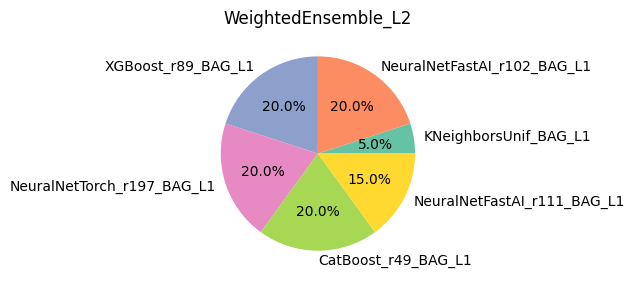

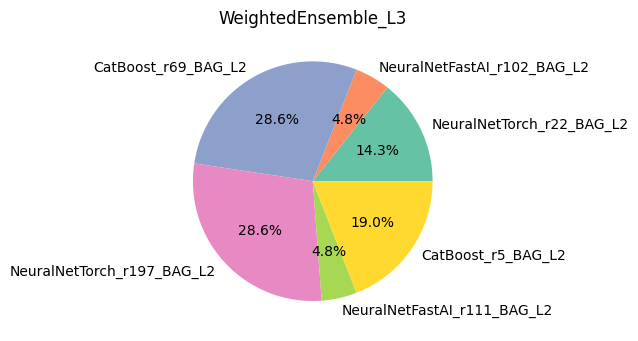

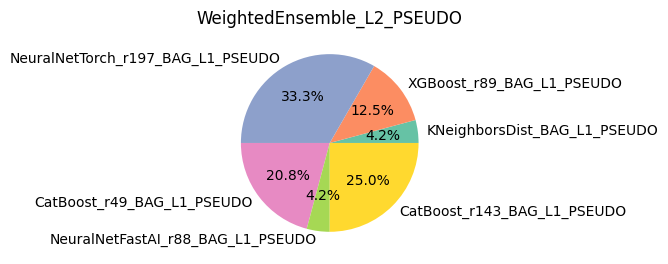

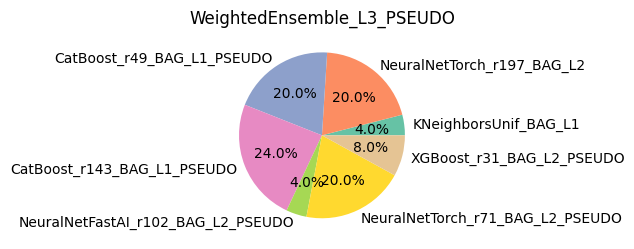

In [8]:
ensemble_weights, selected_models = get_ensemble_weights(predictor)

for key, value in ensemble_weights.items():
    plt.figure(figsize=(6, 6))
    plt.pie(value.values(), labels=value.keys(), autopct='%1.1f%%', colors=sns.color_palette('Set2', len(value)))
    plt.title(key)
    plt.tight_layout()
    plt.show()

In [9]:
predictor.leaderboard(silent=True)[predictor.leaderboard(silent=True).model.isin(selected_models)].style.background_gradient(subset=['score_val'], cmap='RdYlGn')

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3_PSEUDO,0.901246,roc_auc,7.690642,476.611686,0.001259,0.266335,3,True,440
1,WeightedEnsemble_L2_PSEUDO,0.900569,roc_auc,0.268424,63.134972,0.001660,0.297870,2,True,331
2,WeightedEnsemble_L2,0.899698,roc_auc,1.031788,130.795127,0.000901,0.246940,2,True,111
3,WeightedEnsemble_L3,0.898263,roc_auc,4.925282,376.680334,0.000990,0.238515,3,True,220
4,CatBoost_r49_BAG_L1_PSEUDO,0.896908,roc_auc,0.013060,7.389853,0.013060,7.389853,1,True,275
5,CatBoost_r143_BAG_L1_PSEUDO,0.896721,roc_auc,0.017617,9.733911,0.017617,9.733911,1,True,294
8,NeuralNetTorch_r197_BAG_L2,0.895912,roc_auc,3.886262,236.710614,0.182293,18.455615,2,True,163
11,NeuralNetTorch_r71_BAG_L2_PSEUDO,0.895865,roc_auc,3.334296,177.733855,0.165116,16.293144,2,True,402
12,CatBoost_r69_BAG_L2,0.895758,roc_auc,3.731635,227.883331,0.027666,9.628331,2,True,146
13,CatBoost_r5_BAG_L2,0.895754,roc_auc,3.746471,226.338172,0.042502,8.083173,2,True,180


# Collecting and saving OOF files

In [10]:
def save_pred_probs(pred_probs, cv_score, name, type, is_ensemble):
    base_path = 'oof_pred_probs' if type == 'oof' else 'test_pred_probs'
    base_path = '.' if is_ensemble else base_path
    with open(f'{base_path}/{name}_{type}_pred_probs_{cv_score:.6f}.pkl', 'wb') as f:
        pickle.dump(pred_probs, f)

def save_submission(test_pred_probs, score):
    sub = pd.read_csv(CFG.sample_sub_path)
    sub[CFG.target] = test_pred_probs
    sub.to_csv(f'sub_autogluon_{score:.6f}.csv', index=False)
    
os.makedirs('oof_pred_probs', exist_ok=True)
os.makedirs('test_pred_probs', exist_ok=True)

In [11]:
oof_pred_probs = {}
test_pred_probs = {}

In [12]:
best_model = predictor.model_best
test_pred_probs = predictor.predict_proba_multi(test)
for model in predictor.model_names():
    model_oof_pred_probs = predictor.predict_proba_oof(model).values[:, 1]
    model_test_pred_probs = test_pred_probs[model].values[:, 1]
    
    cv_score = roc_auc_score(train[CFG.target], model_oof_pred_probs)
    if model != best_model:
        save_pred_probs(model_oof_pred_probs, cv_score, model, 'oof', False)
        save_pred_probs(model_test_pred_probs, cv_score, model, 'test', False)
    else:
        save_pred_probs(model_oof_pred_probs, cv_score, model, 'oof', True)
        save_pred_probs(model_test_pred_probs, cv_score, model, 'test', True)
        save_submission(model_test_pred_probs, cv_score)
        
    oof_pred_probs[model] = model_oof_pred_probs
    test_pred_probs[model] = model_test_pred_probs

INFO:sklearnex: sklearn.neighbors.KNeighborsClassifier.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsClassifier.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsClassifier.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsClassifier.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsClassifier.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsClassifier.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsClassifier.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsClassifier.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsClassifier.predict_proba: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsClassifier.

# Visualizing the results

In [13]:
scores = {}
split = StratifiedKFold(n_splits=CFG.n_folds, random_state=CFG.seed, shuffle=True).split(train, train[CFG.target])
for fold_idx, (train_index, val_index) in enumerate(split):
    for model in predictor.model_names():
        fold_score = roc_auc_score(train.loc[val_index, CFG.target], oof_pred_probs[model][val_index])
        if model not in scores:
            scores[model] = []
        scores[model].append(fold_score)

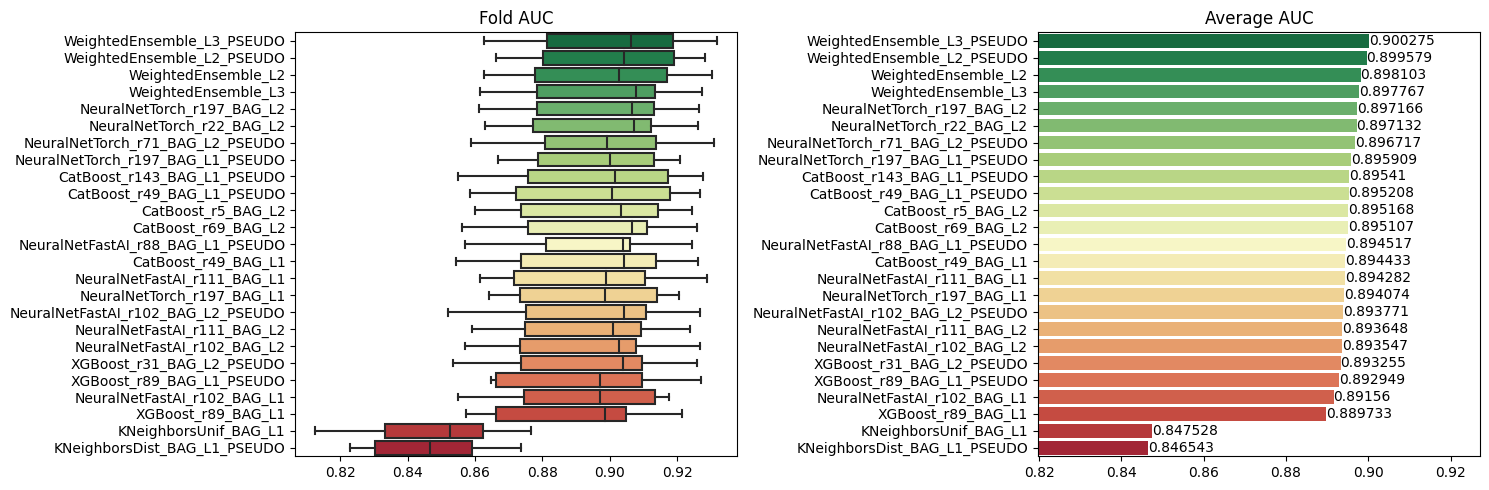

In [14]:
scores = pd.DataFrame(scores)[selected_models]
mean_scores = scores.mean().sort_values(ascending=False)
order = scores.mean().sort_values(ascending=False).index.tolist()

min_score = mean_scores.min()
max_score = mean_scores.max()
padding = (max_score - min_score) * 0.5
lower_limit = min_score - padding
upper_limit = max_score + padding

fig, axs = plt.subplots(1, 2, figsize=(15, scores.shape[1] * 0.2))

sns.boxplot(data=scores, order=order, ax=axs[0], orient='h', palette='RdYlGn_r')
axs[0].set_title('Fold AUC')
axs[0].set_xlabel('')
axs[0].set_ylabel('')

barplot = sns.barplot(x=mean_scores.values, y=mean_scores.index, ax=axs[1], palette='RdYlGn_r')
axs[1].set_title('Average AUC')
axs[1].set_xlabel('')
axs[1].set_xlim(left=lower_limit, right=upper_limit)
axs[1].set_ylabel('')

for i, score in enumerate(mean_scores.values):
    barplot.text(score, i, round(score, 6), va='center')

plt.tight_layout()
plt.show()